In [1]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

Gensim downloader background: https://radimrehurek.com/gensim/downloader.html

In [2]:
import gensim.downloader as api
word2vec_model = api.load("glove-twitter-25")  # load glove vectors`

In [3]:
word2vec_model.most_similar("cat")  # show words that similar to word 'cat'

[('dog', 0.9590819478034973),
 ('monkey', 0.9203579425811768),
 ('bear', 0.9143137335777283),
 ('pet', 0.9108030796051025),
 ('girl', 0.8880630135536194),
 ('horse', 0.8872727155685425),
 ('kitty', 0.8870541453361511),
 ('puppy', 0.8867697715759277),
 ('hot', 0.886525571346283),
 ('lady', 0.8845518827438354)]

In [24]:
word2vec_model["house"]

array([-1.1589   ,  0.40706  ,  1.2051   , -0.19056  ,  0.11131  ,
       -0.051701 ,  0.91339  , -0.35861  ,  0.59744  ,  0.18681  ,
       -0.18825  , -0.42439  , -4.6994   , -0.0090055,  0.40719  ,
       -0.27002  ,  0.32667  , -0.36875  , -0.48711  , -0.20568  ,
        0.3559   , -0.3417   ,  0.27324  , -0.3588   ,  0.58548  ],
      dtype=float32)

In [25]:
word2vec_model.most_similar(positive=['boy', 'queen'], negative=['girl'], topn=1)

[('king', 0.9506246447563171)]

In [26]:
# CAUTION: This can take 10mins to download and run
word2vec_model2 = api.load('word2vec-google-news-300') # larger dimensions
word2vec_model2["genius"]

array([ 0.26367188, -0.12597656,  0.15429688,  0.3203125 , -0.00376892,
        0.25390625,  0.14453125, -0.30664062,  0.34960938, -0.22167969,
       -0.00769043, -0.23046875, -0.06201172, -0.26367188, -0.05737305,
        0.18945312,  0.08007812,  0.08740234,  0.11816406, -0.12304688,
       -0.14550781,  0.04907227,  0.25390625, -0.00125122,  0.30664062,
        0.03759766,  0.02160645, -0.03588867, -0.34765625,  0.02490234,
       -0.22753906,  0.09912109, -0.03955078,  0.3046875 ,  0.31054688,
        0.15625   ,  0.09277344, -0.00176239,  0.19042969,  0.203125  ,
        0.30664062, -0.11523438,  0.10253906,  0.14355469,  0.21777344,
       -0.07519531, -0.17089844,  0.06689453,  0.03759766,  0.0234375 ,
       -0.68359375,  0.38867188, -0.12207031, -0.0625    ,  0.07861328,
        0.07861328,  0.1484375 , -0.42578125, -0.06787109,  0.11132812,
        0.18066406,  0.23632812,  0.03540039, -0.47851562,  0.11962891,
       -0.26171875, -0.14746094,  0.05078125, -0.13476562,  0.07

In [11]:
word2vec_model2["genius"]

array([ 0.26367188, -0.12597656,  0.15429688,  0.3203125 , -0.00376892,
        0.25390625,  0.14453125, -0.30664062,  0.34960938, -0.22167969,
       -0.00769043, -0.23046875, -0.06201172, -0.26367188, -0.05737305,
        0.18945312,  0.08007812,  0.08740234,  0.11816406, -0.12304688,
       -0.14550781,  0.04907227,  0.25390625, -0.00125122,  0.30664062,
        0.03759766,  0.02160645, -0.03588867, -0.34765625,  0.02490234,
       -0.22753906,  0.09912109, -0.03955078,  0.3046875 ,  0.31054688,
        0.15625   ,  0.09277344, -0.00176239,  0.19042969,  0.203125  ,
        0.30664062, -0.11523438,  0.10253906,  0.14355469,  0.21777344,
       -0.07519531, -0.17089844,  0.06689453,  0.03759766,  0.0234375 ,
       -0.68359375,  0.38867188, -0.12207031, -0.0625    ,  0.07861328,
        0.07861328,  0.1484375 , -0.42578125, -0.06787109,  0.11132812,
        0.18066406,  0.23632812,  0.03540039, -0.47851562,  0.11962891,
       -0.26171875, -0.14746094,  0.05078125, -0.13476562,  0.07

In [31]:
vocab = ["strong", "handsome", "beautiful", "shy", "outgoing", "terrific", "boy", "girl", "man", "woman", "great", "sincere", "passion", "king", "queen", "banana", "apple", "mango", "fruit", "coconut", "orange"]

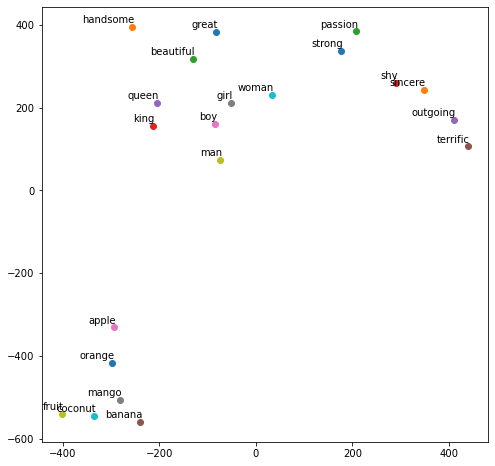

In [32]:
# code credit: https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne
def tsne_plot(model):
    labels = []
    wordvecs = []

    for word in vocab:
        wordvecs.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=3, n_components=2, init='pca', random_state=42)
    coordinates = tsne_model.fit_transform(wordvecs)

    x = []
    y = []
    for value in coordinates:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(8,8)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(2, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

tsne_plot(word2vec_model)
